In [5]:
%matplotlib inline

In [26]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi". # You will need to use more features
##### 'email_address' fails featureFormat() as it is string not float, all other features imported for 
##### initial testing and investigations
features_list = ['poi', 'salary', 'bonus','deferral_payments','total_payments',  
                 'exercised_stock_options','restricted_stock','total_stock_value',
                 'expenses','deferred_income',
                 'long_term_incentive', 'other',
                 'restricted_stock_deferred', 'loan_advances', 'director_fees', 
                 'to_messages', 'shared_receipt_with_poi','from_messages',      
                 'from_this_person_to_poi', 'from_poi_to_this_person'             
                ] 

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers - remove TOTAL from financials    
total_financials = data_dict.pop('TOTAL')
### Negative outliers found in deferred_income and restricted stock deferred
### Entries for 'BELFER ROBERT' & 'BHATANGAR SANJAY' corrected as confirmed by enron61702insiderpay.pdf

data_dict['BELFER ROBERT']['deferred_income']  = -102500
data_dict['BELFER ROBERT']['deferral_payments']= 'NaN'
data_dict['BELFER ROBERT']['expenses'] = 3285
data_dict['BELFER ROBERT']['director_fees'] = 102500 
data_dict['BELFER ROBERT']['total_payments'] = 3285
data_dict['BELFER ROBERT']['exercised_stock_options']= 'NaN'
data_dict['BELFER ROBERT']['restricted_stock']= 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred']= -44093
data_dict['BELFER ROBERT']['total_stock_value'] = 'NaN'

data_dict['BHATNAGAR SANJAY']['other']= 'NaN' 
data_dict['BHATNAGAR SANJAY']['expenses']= 137864
data_dict['BHATNAGAR SANJAY']['director_fees']= 'NaN'
data_dict['BHATNAGAR SANJAY']['total_payments']= 137864
data_dict['BHATNAGAR SANJAY']['exercised_stock_options']= 15456290 
data_dict['BHATNAGAR SANJAY']['restricted_stock']= 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred']= -2604490
data_dict['BHATNAGAR SANJAY']['total_stock_value']= 15456290

### Split data to labels and features from array used after feature scaling with function
#data = featureFormat(data_dict, features_list, sort_keys = True)
#labels, features = targetFeatureSplit(data)


In [19]:
#Cursory look at feature values, numbers and negative values
from __future__ import division
for items in features_list:
    value_exists = 0
    pos_poi = 0
    neg_poi = 0 
    for names in data_dict:
        if data_dict[names][items] != "NaN":
            value_exists = value_exists + 1
            if data_dict[names]['poi'] == 1:
                pos_poi = pos_poi+1
            else:    neg_poi = neg_poi+1
    print items, value_exists, " entries poi:  ",pos_poi, neg_poi, (pos_poi/value_exists)*100.0
    
for items in features_list:
    neg_value = 0 
    for names in data_dict:
        if data_dict[names][items] != "NaN" and data_dict[names][items] <0:
            neg_value = neg_value + 1
    if neg_value >0:
        print items, neg_value, " Neg values exist"



poi 145  entries poi:   18 127 12.4137931034
salary 94  entries poi:   17 77 18.085106383
bonus 81  entries poi:   16 65 19.7530864198
deferral_payments 37  entries poi:   5 32 13.5135135135
total_payments 124  entries poi:   18 106 14.5161290323
exercised_stock_options 100  entries poi:   12 88 12.0
restricted_stock 110  entries poi:   17 93 15.4545454545
total_stock_value 125  entries poi:   18 107 14.4
expenses 96  entries poi:   18 78 18.75
deferred_income 49  entries poi:   11 38 22.4489795918
long_term_incentive 65  entries poi:   12 53 18.4615384615
other 91  entries poi:   18 73 19.7802197802
to_messages 86  entries poi:   14 72 16.2790697674
shared_receipt_with_poi 86  entries poi:   14 72 16.2790697674
from_messages 86  entries poi:   14 72 16.2790697674
from_this_person_to_poi 86  entries poi:   14 72 16.2790697674
from_poi_to_this_person 86  entries poi:   14 72 16.2790697674
deferred_income 49  Neg values exist


145 19 20
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] [ 0.25532535  0.14272044  0.0266425   0.00176051  0.0072226   0.07823137
  0.00466612  0.01460097  0.83717943  0.13342003  0.04525917  0.8393357
  0.33990755  0.70428392  0.13363772  0.21280397  0.04157082  0.06770535
  0.12290786]
{'to_messages': 807.0, 'deferral

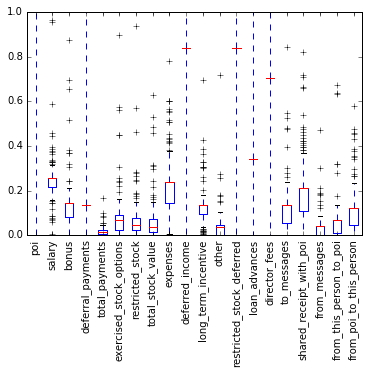

In [420]:
### Task 3: Create new feature(s)

## create dataframe of dict with features as cols and names as index
#https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionary
from __future__ import division
import numpy as np
import pandas as pd

df_data = pd.DataFrame.from_dict({(i): data_dict[i]
                           for i in data_dict.keys()},
                           orient='index')


#list of features that are numbers
numbers = list(df_data)  
numbers.remove('email_address') 
numbers.remove('poi')

#ensure pd.dataframe values are 'float' for mathematical operations
for trait in [numbers]:
    df_data[trait] = df_data[trait].astype('float')

# new features:
 
df_data['take_home'] = df_data['salary'] + df_data['bonus']
df_data['percent_exercised'] = df_data['exercised_stock_options']/df_data['total_stock_value']
df_data['response_rate'] = df_data['from_messages']/df_data['to_messages']
df_data['poi_response'] = df_data['from_this_person_to_poi']/df_data['from_poi_to_this_person']

new_features=['take_home', 'percent_exercised', 'response_rate', 'poi_response']
numbers = numbers + new_features 

##Replace inf with NaN
#df_data.dropna(0,'all') -> no rows with all empty features
df_data = df_data.replace(np.inf, np.nan)
#df_data.plot.box(rot=90)

##Data Prepocessing: Imputation and Scaling 
imputed_data = df_data.copy()
for col in numbers:
    ave =  imputed_data[col].mean()
    imputed_data[col] = imputed_data[col].replace(np.nan, ave)

#print imputed_data.describe()
#imputed_data.plot.box(rot=90)

## Scale in pd.dataframe MinMaxScaler-type for all features
scaled_data = imputed_data.copy()
scaled_data = ((test_data - test_data.min())/(test_data.max()-test_data.min())).astype('float')

## Review Features: correlation matrix pandas, boxplot, statistics
## https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
s= scaled_data.corr()
s_order = s.unstack().sort_values(ascending=False)
#print s_order[0:50]
#df_data.describe()
scaled_data[my_features].plot.box(rot=90)

## Store new features and corrections to my_dataset dictionary for easy export below.
my_data_imputed = imputed_data.to_dict(orient='index')
my_dataset = scaled_data.to_dict(orient='index')

## Removed features: 
## 'restricted_stock_deferred', 17 entries; 'loan_advances', 3 entries; 'director_fees',16 entries
##      -limited entries <10%, 2 have no POIs to classify on

#my_features = ['poi','exercised_stock_options', 'take_home','salary','total_payments',
#               'long_term_incentive','deferred_income','shared_receipt_with_poi', 'from_poi_to_this_person',
#               'from_this_person_to_poi','from_messages','to_messages','percent_exercised'] 

my_features = ['poi','salary', 'bonus','deferral_payments','total_payments',  
               'exercised_stock_options','restricted_stock','total_stock_value',
               'expenses','deferred_income',
               'long_term_incentive', 'other',
               'restricted_stock_deferred', 'loan_advances', 'director_fees', 
               'to_messages', 'shared_receipt_with_poi','from_messages',      
               'from_this_person_to_poi', 'from_poi_to_this_person'       ]
### Extract features and labels from dataset for local testing
def feature_extraction(mydata_dict, features_lineup):
    data = featureFormat(mydata_dict, features_lineup, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    return labels,features
    
labels, features = feature_extraction(my_dataset, my_features)
print len(labels), len(features[1]), len(my_features)
print labels, features[1]
print my_data_imputed['METTS MARK']

In [101]:
### Linear Regression of Continuous variables Scaled Data
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

def reg_setup( f_train, f_test, t_train, t_test):
    reg = LinearRegression()
    reg = reg.fit(f_train, t_train)
    print "Slope:", reg.coef_, "Intercept: ",  reg.intercept_
    print "Score Train:", reg.score(f_train, t_train)
    print "Score Test:",  reg.score(f_test, t_test)
    return reg

### training-testing split needed in regression, just like classification
feature_train, feature_test, target_train, target_test = train_test_split(features, labels, 
                                                                              test_size=0.5, random_state=42)

reg = reg_setup(feature_train, feature_test, target_train, target_test)

Slope: [ 0.03418121  2.92935824  0.13149497  1.80127123  3.18055869  1.07517356
 -3.47326702  0.04634238 -0.68271738  0.54502533 -2.14135533 -3.07536791
  1.3614089   4.20487132 -0.57775675  0.14006872 -2.25899524 -0.18196414
 -3.90645005  1.11696965] Intercept:  0.726119690395
Score Train: 0.496925803538
Score Test: -0.592791403756


['salary', 'bonus'] Points Available:  81 81
Slope: [ 0.03954061] Intercept:  240047.159404
Score Train: 0.238559366868
Score Test: 0.203020850473
Slope New Test Regression: [ 0.13604032]


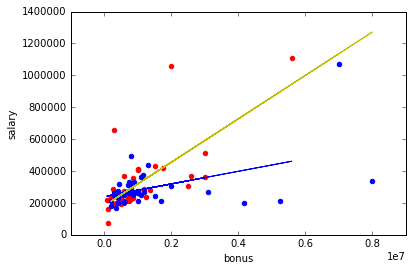

['bonus', 'deferral_payments'] Points Available:  21 21
Slope: [ 1.63533789] Intercept:  347723.562643
Score Train: 0.850349298822
Score Test: -2.52602881464
Slope New Test Regression: [ 0.04564301]


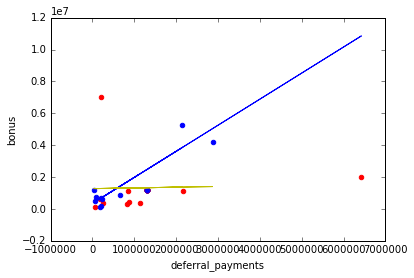

['deferral_payments', 'total_payments'] Points Available:  37 37
Slope: [-0.00324212] Intercept:  596725.494892
Score Train: 0.00940362791198
Score Test: -0.141679340326
Slope New Test Regression: [ 0.38120493]


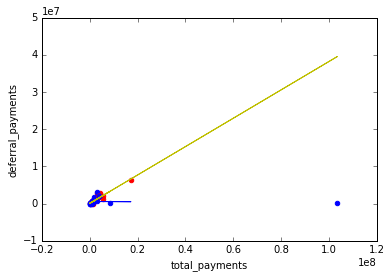

['total_payments', 'exercised_stock_options'] Points Available:  85 85
Slope: [ 0.23249312] Intercept:  1518614.22735
Score Train: 0.130997159617
Score Test: 0.113379299275
Slope New Test Regression: [ 1.44020248]


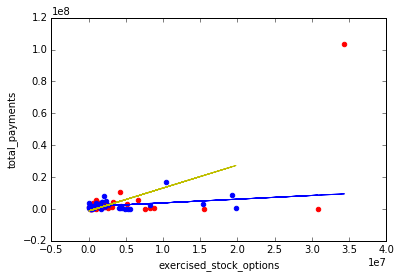

['exercised_stock_options', 'restricted_stock'] Points Available:  82 82
Slope: [ 1.37538107] Intercept:  1784255.31539
Score Train: 0.48351883878
Score Test: 0.274090991862
Slope New Test Regression: [ 1.96308592]


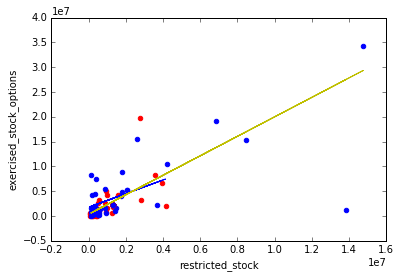

['restricted_stock', 'total_stock_value'] Points Available:  107 107
Slope: [ 0.26305479] Intercept:  136846.888069
Score Train: 0.776317129261
Score Test: 0.69240157308
Slope New Test Regression: [ 0.30390837]


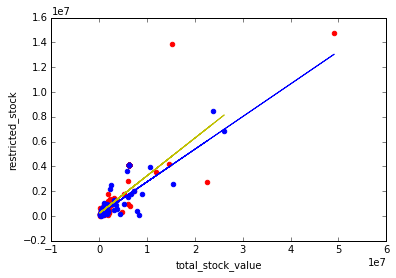

['total_stock_value', 'expenses'] Points Available:  85 85
Slope: [ 8.45999192] Intercept:  5826547.29986
Score Train: 0.00185068936819
Score Test: -0.468643027705
Slope New Test Regression: [ 18.56624878]


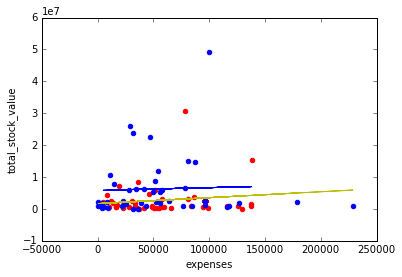

['expenses', 'deferred_income'] Points Available:  38 38
Slope: [ -8.22328240e-05] Intercept:  54488.9898695
Score Train: 5.533595546e-06
Score Test: -0.00223616151794
Slope New Test Regression: [ 0.00904445]


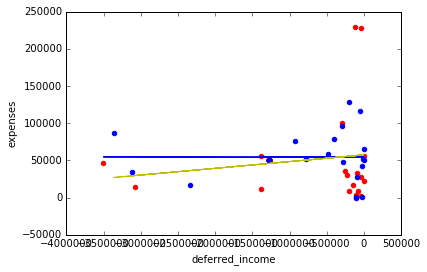

['deferred_income', 'long_term_incentive'] Points Available:  23 23
Slope: [-0.21060071] Intercept:  -490107.277513
Score Train: 0.0500224974636
Score Test: -0.233337840462
Slope New Test Regression: [-0.81698284]


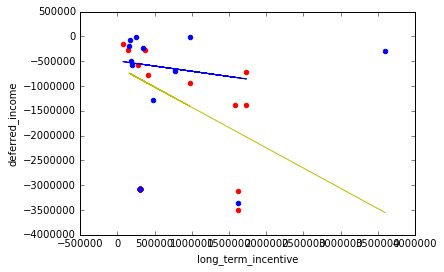

['long_term_incentive', 'other'] Points Available:  64 64
Slope: [-0.1985564] Intercept:  665651.446826
Score Train: 0.0150567582737
Score Test: -0.79414025405
Slope New Test Regression: [ 0.29046531]


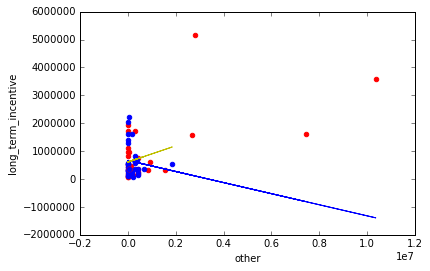

['other', 'to_messages'] Points Available:  62 62
Slope: [ 33.9888141] Intercept:  467011.999119
Score Train: 0.00320497500656
Score Test: -0.00879986390984
Slope New Test Regression: [ 3.50256756]


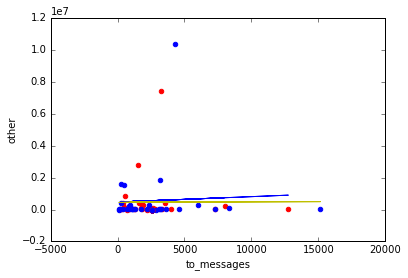

['to_messages', 'shared_receipt_with_poi'] Points Available:  86 86
Slope: [ 1.66090583] Intercept:  87.8821916193
Score Train: 0.699248687276
Score Test: 0.719168570784
Slope New Test Regression: [ 2.08056348]


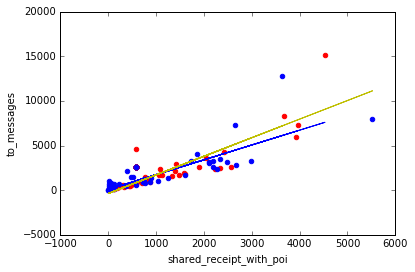

['shared_receipt_with_poi', 'from_messages'] Points Available:  86 86
Slope: [ 0.44127448] Intercept:  886.698857502
Score Train: 0.246622714206
Score Test: -0.614740653891
Slope New Test Regression: [ 0.03625174]


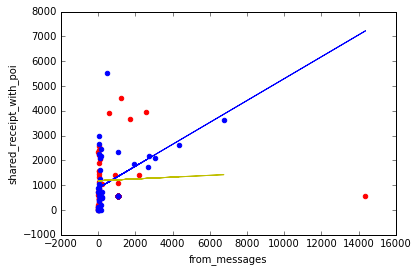

['from_messages', 'from_this_person_to_poi'] Points Available:  66 66
Slope: [ 11.13300424] Intercept:  368.019305031
Score Train: 0.297133948079
Score Test: 0.281981942558
Slope New Test Regression: [ 8.03879754]


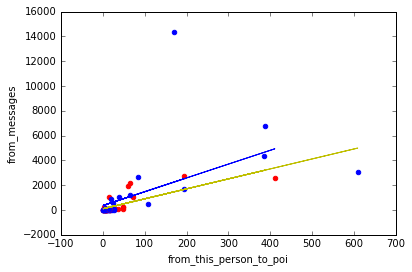

['from_this_person_to_poi', 'from_poi_to_this_person'] Points Available:  63 63
Slope: [ 0.38157525] Intercept:  31.1106209625
Score Train: 0.0435205589529
Score Test: 0.304915140237
Slope New Test Regression: [ 0.53421963]


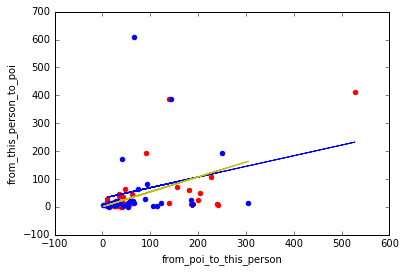

In [102]:
### Linear Regression of Continuous variables 
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

def reg_setup( f_train, f_test, t_train, t_test):
    reg = LinearRegression()
    reg = reg.fit(f_train, t_train)
    print "Slope:", reg.coef_, "Intercept: ",  reg.intercept_
    print "Score Train:", reg.score(f_train, t_train)
    print "Score Test:",  reg.score(f_test, t_test)
    return reg

def malen( f_train, f_test, t_train, t_test, features_list):
    train_color = "b"
    test_color = "r"
    ### draw the scatterplot, with color-coded training and testing points
    for feature, target in zip(f_test, t_test):
        plt.scatter( feature, target, color=test_color ) 
    for feature, target in zip(f_train, t_train):
        plt.scatter( feature, target, color=train_color ) 

    ### labels for the legend
        plt.scatter(f_test[0], t_test[0], color=test_color, label="test")
        plt.scatter(f_test[0], t_test[0], color=train_color, label="train")

    ### draw the regression line, once it's coded
    try:
        plt.plot( f_test, reg.predict(f_test) )
    except NameError:
        pass

    reg.fit(f_test, t_test)
    print "Slope New Test Regression:", reg.coef_
    plt.plot(f_train, reg.predict(f_train), color="y") 
    plt.xlabel(features_list[1])
    plt.ylabel(features_list[0])
#   plt.legend()
    plt.show()


for items in range(len(features_list)-2):
    two_features = [features_list[items+1], features_list[items+2]]
    data_regress = featureFormat(data_dict, two_features, remove_any_zeroes=True)
    target, features = targetFeatureSplit(data_regress)

    ### training-testing split needed in regression, just like classification
    feature_train, feature_test, target_train, target_test = train_test_split(features, target, 
                                                                              test_size=0.5, random_state=42)
    print two_features, "Points Available: ", len(target), len(data_regress)
    reg = reg_setup(feature_train, feature_test, target_train, target_test)
    paint = malen(feature_train, feature_test, target_train, target_test, two_features)


In [328]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectPercentile, f_classif

## Create VarianceThreshold object to rank feature variances
thresholder = VarianceThreshold()
X_high_variance = thresholder.fit(features)
## List Features with Ranked variances (ascending)
t_vars = thresholder.variances_
t_vars_sort = np.argsort(thresholder.variances_)
print "VarianceThreshold:"
for i in t_vars_sort:
    print my_features[i+1], t_vars[i]

######################
## KBest takes Featues, target(labels), select k features
kbest = SelectKBest(f_regression, k=9).fit(features, labels)
#trans = kbest.transform(X)

k_scores_sort = np.argsort(kbest.scores_)
k_pvals  = selection.pvalues_
print "SelectKBest:"
for f in k_scores_sort:
    print my_features[f+1], 'score: ', k_scores[f], k_pvals[f]

#####################    
## Select Percentile, default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features, labels)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
print "SelectPercentile:"
for f in np.argsort(scores):
    print my_features[f+1], 'score: ', scores[f], k_pvals[f]


percent_exercised score:  0.370461777688 0.543718301293
to_messages score:  1.89263889899 0.171055559042
from_messages score:  6.00007938769 0.0155137082597
from_this_person_to_poi score:  5.86632518771 0.0166851706786
from_poi_to_this_person score:  0.405485442931 0.525287901605
shared_receipt_with_poi score:  19.9864365766 1.57623825499e-05
deferred_income score:  6.58007383954 0.0113428038865
long_term_incentive score:  26.337749095 9.18863764631e-07
total_payments score:  8.35618192892 0.00444380848503
salary score:  0.452635531004 0.502171769936
take_home score:  11.5054132086 0.00089764854284
exercised_stock_options score:  9.45493048777 0.00252318885358
Select Percentile: [ 6.03674887  3.21525921  2.59805024  2.35224467  1.80928438  1.77766935
  1.75370889  1.08272197  0.61275629  0.35271916  0.26462605  0.01275709]
[ 1.          0.53261437  0.43037242  0.38965422  0.29971172  0.29447462
  0.29050552  0.17935514  0.10150435  0.05842866  0.04383586  0.00211324]
percent_exercised 

In [329]:
print len(features), features[1]

## PCA()
###########################

def doPCA(data, nummer):
    from sklearn.decomposition import PCA
    pca = PCA(n_components = nummer)
    pca.fit(data)
    return pca  

pca = doPCA(features, 12)
print "PCA 12 components single run:"
print pca.explained_variance_ratio_
print len(pca.components_)
#transformed_data = pca.transform(select_comp)

145 [ 0.0072226   0.16346077  0.25532535  0.00176051  0.13342003  0.83717943
  0.21280397  0.12290786  0.06770535  0.04157082  0.13363772  1.        ]


In [474]:
def split_sets(features, labels, test_amt, r_state): 
    f_train, f_test, l_train, l_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    return f_train, f_test, l_train, l_test   

def feature_extraction(mydata_dict, features_lineup):
    data = featureFormat(mydata_dict, features_lineup, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    return labels,features

my_features = ['poi','exercised_stock_options', 'total_stock_value',
               'take_home','bonus', 'salary', 
               'total_payments','restricted_stock','long_term_incentive',
               'deferred_income','shared_receipt_with_poi',
               'from_poi_to_this_person'
                ]

labels, features = feature_extraction(my_dataset, my_features)
features_train, features_test, labels_train, labels_test = split_sets(features, labels, 0.3, 42)
print features[1], len(features), features_train[1]

[ 0.0072226   0.00466612  0.16346077  0.14272044  0.25532535  0.00176051
  0.07823137  0.13342003  0.83717943  0.21280397  0.12290786] 145 [ 0.00313781  0.00951147  0.1148967   0.09205549  0.28251383  0.01063392
  0.02346504  0.13342003  0.988464    0.01250226  0.        ]


In [462]:
###########################
## Pipeline for feature reduction with PCA()/SelectKBest
## http://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html
#sphx-glr-auto-examples-compose-plot-compare-reduction-py

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split



pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('classify', SVC())
])

N_FEATURES_OPTIONS = [2,3, 5, 7, 10]
S_FUNC = [f_regression, f_classif]
C_OPTIONS = [25, 40, 45, 50, 60]
WHITEWASH =[True, False]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        #'reduce_dim__whiten':WHITEWASH,
        'classify__C': C_OPTIONS
    },        {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'reduce_dim__score_func': S_FUNC,
        'classify__C': C_OPTIONS
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid)
grid.fit(features_train, labels_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
#mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
#mean_scores = mean_scores.max(axis=0)
print "Pipeline PCA()/SelectKBest with SCV classifier"
print mean_scores
print grid.best_score_
grid.cv_results_['params'][grid.best_index_]

Pipeline PCA()/SelectKBest with SCV classifier
[ 0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.87128713  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.87128713  0.87128713  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.87128713
  0.87128713  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.85148515  0.85148515  0.87128713  0.87128713  0.86138614
  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.85148515
  0.85148515  0.87128713  0.87128713  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.86138614  0.85148515  0.85148515  0.87128713
  0.87128713  0.86138614  0.86138614]
0.871287128713


{'classify__C': 60,
 'reduce_dim': PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'reduce_dim__n_components': 2}

In [476]:
## Pipeline for classifier selection with one feature reduction

from sklearn.naive_bayes import GaussianNB
from sklearn import tree, neighbors
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

pipe2 = Pipeline([
    ('reduce_dim', SelectKBest(f_regression)),
    ('classify', GaussianNB())
])

N_FEATURES_OPTIONS = [2, 3, 5, 7, 9, 11]
C_OPTIONS = [25, 40, 45, 50, 60]
SPLITS = [2, 10, 25, 30]
WEIGHTS = ['distance', 'uniform']
NACHBARN = [5, 10, 50]
ESTIMATES = [2,10,25,50]

param_grid = [
    {
        'reduce_dim__k': N_FEATURES_OPTIONS,
    #    'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [SVC()],
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim__k': N_FEATURES_OPTIONS,
    #    'reduce_dim__n_components': N_FEATURES_OPTIONS, 
        'classify': [GaussianNB()]
    },
    {
        'reduce_dim__k': N_FEATURES_OPTIONS,
    #    'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [tree.DecisionTreeClassifier()],
        'classify__min_samples_split': SPLITS 
    },
    {
        'reduce_dim__k': N_FEATURES_OPTIONS,
    #    'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [neighbors.KNeighborsClassifier()],
        'classify__n_neighbors': NACHBARN,
        'classify__weights': WEIGHTS
    },
    {
        'reduce_dim__k': N_FEATURES_OPTIONS,
    #    'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [RandomForestClassifier()],
        'classify__n_estimators': ESTIMATES
    },
    {
       'reduce_dim__k': N_FEATURES_OPTIONS,
    #    'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [AdaBoostClassifier()],
        'classify__n_estimators': ESTIMATES
    },
]



grid = GridSearchCV(pipe2, param_grid=param_grid)
grid.fit(features_train, labels_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
#mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
#mean_scores = mean_scores.max(axis=0)
print "Pipeline SelectKBest with various classifiers"
print mean_scores
print grid.best_score_
grid.cv_results_['params'][grid.best_index_]

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [366]:
pipe2 = Pipeline([
    ('reduce_dim', SelectKBest(f_regression)),
    ('classify', SVC())
])

N_FEATURES_OPTIONS = [2, 3, 4, 5, 6, 10,11]
C_OPTIONS = [25, 30, 40, 45, 50]
WEIGHTS = ['distance', 'uniform']
NACHBARN = [3,5,8,10]
ESTIMATES = [2,4,6,10,25]

param_grid = [
    {
        'reduce_dim': [SelectKBest(f_regression)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify': [SVC()],
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(f_regression)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify': [neighbors.KNeighborsClassifier()],
        'classify__n_neighbors': NACHBARN,
        'classify__weights': WEIGHTS
    },
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [SVC()],
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [neighbors.KNeighborsClassifier()],
        'classify__n_neighbors': NACHBARN,
        'classify__weights': WEIGHTS
    },
]



grid = GridSearchCV(pipe2, param_grid=param_grid)
grid.fit(features_train, labels_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
#mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
#mean_scores = mean_scores.max(axis=0)
print "Pipeline SelectKBest with various classifiers"
print mean_scores
print grid.best_score_
grid.cv_results_['params'][grid.best_index_]

Pipeline SelectKBest with various classifiers
[ 0.86138614  0.87128713  0.86138614  0.86138614  0.86138614  0.86138614
  0.85148515  0.86138614  0.86138614  0.86138614  0.87128713  0.86138614
  0.86138614  0.85148515  0.86138614  0.86138614  0.86138614  0.87128713
  0.87128713  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.87128713  0.85148515  0.86138614  0.86138614  0.86138614
  0.85148515  0.87128713  0.87128713  0.85148515  0.86138614  0.84158416
  0.82178218  0.86138614  0.85148515  0.85148515  0.81188119  0.82178218
  0.84158416  0.82178218  0.85148515  0.85148515  0.85148515  0.81188119
  0.82178218  0.87128713  0.85148515  0.85148515  0.84158416  0.84158416
  0.85148515  0.85148515  0.86138614  0.85148515  0.84158416  0.85148515
  0.85148515  0.85148515  0.85148515  0.86138614  0.86138614  0.85148515
  0.85148515  0.85148515  0.85148515  0.85148515  0.86138614  0.86138614
  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.8

{'classify': SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'classify__C': 25,
 'reduce_dim': SelectKBest(k=3, score_func=<function f_regression at 0x10c250758>),
 'reduce_dim__k': 3}

In [247]:
### Task 4: Try a varity of classifiers - Name classifier clf for easy export below.
### To do PCA or other multi-stage operations, you'll need to use Pipelines. 
### More info: http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
import sys
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


clf = GaussianNB()
#GaussianNB(priors=None, var_smoothing=1e-09)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=30)


clf.fit(features_train, labels_train)


t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

p0 = time()
pred = clf.predict(features_test)
print "predicting time:", round(time()-p0, 3), "s"

accuracy = clf.score(features_test, labels_test)

print("Accuracy is ", accuracy)

acc = accuracy_score(labels_test, pred)
print ("GNB Accuracy_Score:  ", acc)




training time: 0.002 s
predicting time: 0.001 s
('Accuracy is ', 0.95454545454545459)
('GNB Accuracy_Score:  ', 0.95454545454545459)


In [267]:
#### classifier 2 - decision tree

from sklearn.metrics import accuracy_score

def classify_tree(features_train, labels_train, split):
    from sklearn import tree
    clf = tree.DecisionTreeClassifier(min_samples_split = split)
    clf = clf.fit(features_train, labels_train)
    return clf

collection = [2,3,4]

for splits in collection:
    t0 = time()   
    tree_clf = classify_tree(features_train, labels_train, splits)
    print "training time:", round(time()-t0, 3), "s"

    p0 = time()
    pred_tree = tree_clf.predict(features_test)
    print "prediction time:", round(time()-p0, 3), "s"
    acc_min_samples_split = accuracy_score(labels_test, pred_tree)
    print (splits,"Accuracy:  ", acc_min_samples_split)
    accuracy = tree_clf.score(features_test, labels_test)
    print("Accuracy is clf.score", accuracy)


training time: 0.003 s
prediction time: 0.001 s
(2, 'Accuracy:  ', 0.86363636363636365)
('Accuracy is clf.score', 0.86363636363636365)
training time: 0.001 s
prediction time: 0.0 s
(3, 'Accuracy:  ', 0.90909090909090906)
('Accuracy is clf.score', 0.90909090909090906)
training time: 0.001 s
prediction time: 0.0 s
(4, 'Accuracy:  ', 0.88636363636363635)
('Accuracy is clf.score', 0.88636363636363635)


In [271]:
#########################################################
### SVC classifier ###

def classify(features_train, labels_train, penalty, gams, kern_type):
    from sklearn.svm import SVC
    clf = SVC(C=penalty, gamma = gams, kernel=kern_type)
    clf = clf.fit(features_train, labels_train)
    return clf

def submitAccuracy():
    return acc

#features_train = features_train[:len(features_train)/100] 
#labels_train = labels_train[:len(labels_train)/100] 

collection = [1000, 500, 10, 1]
for penalties in collection:
    t0 = time()   
    svc_clf = classify(features_train, labels_train, penalties, 0.9, 'rbf')
    print "training time:", round(time()-t0, 3), "s"

    p0 = time()
    pred = svc_clf.predict(features_test)
    print "prediction time:", round(time()-p0, 3), "s"
    acc = accuracy_score(labels_test, pred)
    print (penalties, "Accuracy SVC:  ", acc)
    accuracy = svc_clf.score(features_test, labels_test)
    print("Accuracy is clf.score", accuracy)

#########################################################

training time: 0.005 s
prediction time: 0.001 s
(1000, 'Accuracy SVC:  ', 0.93181818181818177)
('Accuracy is clf.score', 0.93181818181818177)
training time: 0.003 s
prediction time: 0.0 s
(500, 'Accuracy SVC:  ', 0.95454545454545459)
('Accuracy is clf.score', 0.95454545454545459)
training time: 0.001 s
prediction time: 0.0 s
(10, 'Accuracy SVC:  ', 0.95454545454545459)
('Accuracy is clf.score', 0.95454545454545459)
training time: 0.001 s
prediction time: 0.0 s
(1, 'Accuracy SVC:  ', 0.93181818181818177)
('Accuracy is clf.score', 0.93181818181818177)


In [272]:
### K Nearest Neighbors

def classify(features_train, labels_train, split):
    from sklearn import neighbors
    clf = neighbors.KNeighborsClassifier(n_neighbors = split, weights = 'distance')
    print "KNeighbors:  ", split
    clf = clf.fit(features_train, labels_train)
    return clf


collection = [100, 75, 1]

for splits in collection:
    t0 = time()   
    k_clf = classify(features_train, labels_train, splits)
    print "training time:", round(time()-t0, 3), "s"

    p0 = time()
    pred_k = k_clf.predict(features_test)
    print "prediction time:", round(time()-p0, 3), "s"
    accuracy = k_clf.score(features_test, labels_test)
    print("Accuracy is clf.score", accuracy)
    acc = accuracy_score(labels_test, pred_k)
    print splits,"Accuracy:  ", acc

KNeighbors:   100
training time: 0.002 s
prediction time: 0.002 s
('Accuracy is clf.score', 0.93181818181818177)
100 Accuracy:   0.931818181818
KNeighbors:   75
training time: 0.0 s
prediction time: 0.001 s
('Accuracy is clf.score', 0.93181818181818177)
75 Accuracy:   0.931818181818
KNeighbors:   1
training time: 0.001 s
prediction time: 0.004 s
('Accuracy is clf.score', 0.79545454545454541)
1 Accuracy:   0.795454545455


In [273]:
## Random Forest 

def classify(features_train, labels_train, split):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators = split)
    clf = clf.fit(features_train, labels_train)
    return clf

collection = [2,10,2000]

for splits in collection:
    t0 = time()   
    rf_clf = classify(features_train, labels_train, splits)
    print "training time:", round(time()-t0, 3), "s"

    p0 = time()
    pred = rf_clf.predict(features_test)
    print "prediction time:", round(time()-p0, 3), "s"

    acc = accuracy_score(labels_test, pred)
    print splits,"Accuracy:  ", acc
    print pred

training time: 0.02 s
prediction time: 0.003 s
2 Accuracy:   0.909090909091
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]
training time: 0.075 s
prediction time: 0.015 s
10 Accuracy:   0.931818181818
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.]
training time: 13.667 s
prediction time: 2.038 s
2000 Accuracy:   0.909090909091
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.]


In [274]:
## AdaBoost

def classify(features_train, labels_train, split):
    from sklearn.ensemble import AdaBoostClassifier
    clf = AdaBoostClassifier(n_estimators = split)
    clf = clf.fit(features_train, labels_train)
    return clf

collection = [2,50,100]

for splits in collection:
    t0 = time()   
    ada_clf = classify(features_train, labels_train, splits)
    print "training time:", round(time()-t0, 3), "s"

    p0 = time()
    pred = ada_clf.predict(features_test)
    print "prediction time:", round(time()-p0, 3), "s"

    acc = accuracy_score(labels_test, pred)
    print splits,"Accuracy:  ", acc

training time: 0.011 s
prediction time: 0.001 s
2 Accuracy:   0.954545454545
training time: 0.26 s
prediction time: 0.01 s
50 Accuracy:   0.909090909091
training time: 0.493 s
prediction time: 0.014 s
100 Accuracy:   0.863636363636


In [193]:
#############play with pipeline
# generate some data to play with
from sklearn.pipeline import Pipeline

# ANOVA (SelectKBest) -> NB
anova_filter = SelectKBest(f_regression)
clf = GaussianNB()
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# example is svs: clf = svm.SVC(kernel='linear')
anova_nb = Pipeline([('anova', anova_filter), ('gnb', clf)])
anova_nb.set_params(anova__k='all').fit(features_train,labels_train)
                     


prediction = anova_nb.predict(features_test)
print "SCORE: ", anova_nb.score(features_test, labels_test)                        

# getting the selected features chosen by anova_filter
print 'support', anova_nb.named_steps['anova'].get_support()

# Another way to get selected features chosen by anova_filter
#print "support 2", anova_nb.named_steps.anova.get_support()

print "Macro precision:", precision_score(labels_test, prediction, average='macro')  

#accuracy = clf.score(features_test, labels_test)

#print("Accuracy is ", accuracy)

SCORE:  0.840909090909
support [ True  True  True  True  True]
Macro precision: 0.561538461538


In [449]:
#play pipeline 2 with PCA() reduction
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


## Load/Prepare dataset
labels, features = feature_extraction(my_dataset, my_features)
pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('classify', SVC())
])
S_FUNCTION = [f_classif, f_regression]
N_FEATURES_OPTIONS = [3,5,7,9,10]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
        {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__score_func': S_FUNCTION,
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid)
grid.fit(features_train, labels_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
#mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
#mean_scores = mean_scores.max(axis=0)

print mean_scores
print grid.best_score_
grid.cv_results_['params'][grid.best_index_]

[ 0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.85148515  0.85148515  0.85148515  0.85148515
  0.85148515  0.85148515  0.85148515  0.85148515  0.86138614  0.86138614
  0.86138614  0.86138614  0.87128713  0.87128713  0.86138614  0.86138614
  0.87128713  0.87128713  0.87128713  0.87128713  0.88118812  0.88118812
  0.84158416  0.84158416  0.85148515  0.85148515  0.85148515  0.85148515
  0.85148515  0.85148515  0.84158416  0.84158416  0.85148515  0.85148515
  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614  0.86138614
  0.86138614  0.86138614  0.85148515  0.85148515  0.85148515  0.86138614
  0.85148515  0.86138614  0.86138614  0.87128713  0.89108911  0.88118812
  0.86138614  0.86138614  0.86138614  0.82178218  0.85148515  0.85148515]
0.891089108911


{'classify__C': 100,
 'reduce_dim': PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'reduce_dim__n_components': 15}

In [276]:
#########################################################
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


labels, features = feature_extraction(my_dataset, my_features)

#transform all data with SelectKBest, score_func chi2, k=2:

reducer = SelectKBest(chi2, k=2)
reducer = reducer.fit(features, labels)
reduced = reducer.transform(features)


#### Example starting point. Try investigating other evaluation techniques!


## from sklearn.model_selection import train_test_split # also from 
## from sklearn.cross_validation import train_test_split
## Split REDUCED data for validation studies
features_train, features_test, labels_train, labels_test = split_sets(reduced, labels, 0.3, 42)
#features_train, features_test, labels_train, labels_test = \
#    train_test_split(features, labels, test_size=0.3, random_state=42)

def classifySVC(features_train, labels_train, penalty, gams, kern_type):
    from sklearn.svm import SVC
    clf = SVC(C=penalty, gamma = gams, kernel=kern_type)
    clf = clf.fit(features_train, labels_train)
    return clf 

### Precision & Recall Metrics
def prec_recall(model, pred, labels_test)
    from sklearn.metrics import precision_score, recall_score, f1_score
    y_true = labels_test
    y_pred = pred
    print model 
    print "Precision:", precision_score(y_true, y_pred)  
    print "Recall:", recall_score(y_true, y_pred)  
    print "F1 Score:", f1_score(y_true, y_pred)  

collection = [1000, 500, 10, 1]
for penalties in collection:  
    clf = classifySVC(features_train, labels_train, penalties, 0.9, 'rbf')

    pred = clf.predict(features_test)
    acc = accuracy_score(labels_test, pred)
    print (penalties, "Accuracy SVC:  ", acc)
    accuracy = svc_clf.score(features_test, labels_test)
    print("Accuracy is clf.score", accuracy)
    
    
## Optimize SVC


pipe_SVC = Pipeline([
        'reduce_dim', SelectKBest(chi2, k=2)),
        ('classify', SVC())
])


C_OPTIONS = [1, 10, 100, 1000]
KERNELS = ['linear', 'rbf', 'poly','sigmoid']
GAMMA = ['auto', 'scale']


param_grid = [
        {
        'classify__C': C_OPTIONS
        'classify__kernel': KERNELS
        'classify__gamma': GAMMA
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid)
grid.fit(features_train, labels_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
#mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
#mean_scores = mean_scores.max(axis=0)

print mean_scores
print grid.best_score_
grid.cv_results_['params'][grid.best_index_]
    
    

Macro precision: 0.142857142857
Micro precision: 0.795454545455
Weighted precision: 0.848367848368
Ave (none): 0.142857142857
Macro recall: 0.25
Micro recall: 0.795454545455
Weighted recall: 0.795454545455
Ave (none) recall: [ 0.85  0.25]


In [473]:
##http://scikit-learn.org/0.16/auto_examples/model_selection/grid_search_digits.html#example-model-selection-grid-search-digits-py
## 

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.svm import SVC

def split_sets(features, labels, test_amt, r_state): 
    f_train, f_test, l_train, l_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    return f_train, f_test, l_train, l_test

## Load/Prepare dataset
labels, features = feature_extraction(my_dataset, my_features)

## Transform all data with chosen reducer -> :
reducer = SelectKBest(f_regression, k=6)
reducer = reducer.fit(features, labels)
reduced = reducer.transform(features)
#reducer = PCA(n_components = 2)
#reducer = reducer.fit(features, labels)
#reduced = reducer.transform(features)

## Split dataset in two parts for cross validation
features_train, features_test, labels_train, labels_test = split_sets(reduced, labels, 0.3, 42)
print len(features_train), len(labels_train)
print features_train[1]
print type(features_train[1])



## Set  parameters by cross-validation

tune_parameters = [{'kernel': ['rbf'], 'C': [ 100, 350, 400, 450, 500, 750],
                    'gamma': [1e-3, 1e-4, 'auto']
                     },
                   {'kernel': ['linear'], 'C': [ 100, 350, 400, 450, 500, 750]},
                   {'kernel': ['poly'],
                    'C': [1, 10, 100, 1000],'degree':[2,3,4],
                    'gamma': [1e-3, 1e-4, 'auto']
                     }
                  ]

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tune_parameters, cv=5)
    clf.fit(features_train, labels_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = labels_test, clf.predict(features_test)
    print(classification_report(y_true, y_pred))
    print()

## Precision Recall F1
### Precision & Recall Metrics
def prec_recall(model, pred, labels_test):
    from sklearn.metrics import precision_score, recall_score, f1_score
    y_true = labels_test
    y_pred = pred
    print model 
    print "Precision:", precision_score(y_true, y_pred)  
    print "Recall:", recall_score(y_true, y_pred)  
    print "F1 Score:", f1_score(y_true, y_pred)
    
    
prec_recall(clf, y_pred, y_true)


101 101
[ 0.00313781  0.00951147  0.09205549  0.28251383  0.01063392  0.02346504]
<type 'numpy.ndarray'>
# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'kernel': 'linear', 'C': 100}
()
Grid scores on development set:
()
0.861 (+/-0.034) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.861 (+/-0.034) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.871 (+/-0.042) for {'kernel': 'rbf', 'C': 100, 'gamma': 'auto'}
0.861 (+/-0.034) for {'kernel': 'rbf', 'C': 350, 'gamma': 0.001}
0.861 (+/-0.034) for {'kernel': 'rbf', 'C': 350, 'gamma': 0.0001}
0.871 (+/-0.042) for {'kernel': 'rbf', 'C': 350, 'gamma': 'auto'}
0.861 (+/-0.034) for {'kernel': 'rbf', 'C': 400, 'gamma': 0.001}
0.861 (+/-0.034) for {'kernel': 'rbf', 'C': 400, 'gamma': 0.0001}
0.871 (+/-0.042) for {'kernel': 'rbf', 'C': 400, 'gamma': 'auto'}
0.861 (+/-0.034) for {'kernel': 'rbf', 'C': 450, 'gamma': 0.001}
0.861 (+/-0.034) for {'kernel': 'rbf', 'C': 450, 'gamma': 0.0001}
0.861 (+/-0.

In [ ]:
#########################################################
### SVC classifier ###

def classify(features_train, labels_train):
    from sklearn.svm import SVC
    clf = SVC(C=500, kernel='linear')
    clf = clf.fit(features_train, labels_train)
    return clf

def submitAccuracy():
    return acc

#features_train = features_train[:len(features_train)/100] 
#labels_train = labels_train[:len(labels_train)/100] 

collection = [1000, 500, 10, 1]
for penalties in collection:
    t0 = time()   
    svc_clf = classify(features_train, labels_train, penalties, 0.9, 'rbf')
    print "training time:", round(time()-t0, 3), "s"

    p0 = time()
    pred = svc_clf.predict(features_test)
    print "prediction time:", round(time()-p0, 3), "s"
    acc = accuracy_score(labels_test, pred)
    print (penalties, "Accuracy SVC:  ", acc)
    accuracy = svc_clf.score(features_test, labels_test)
    print("Accuracy is clf.score", accuracy)

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)